# 로지스틱 회귀
### 외인의 알코올 도수, 당도, pH값으로 와인 종류 구별


In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
# class 0 >> 레드 와인
# class 1 >> 화이트 와인 (양성 클래스)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
# 누락값 확인하는 데 유용
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [12]:
# 간략한 통계 확인하는 데 유용
wine.describe()
# 알콜도수, 당도, pH 값의 스케일이 다름!! >> 특성 표준화 진행
data = wine[['alcohol','sugar','pH']]
target = wine['class']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# 준비 끝!

### 로지스틱 회귀 모델 생성 및 훈련

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 점수가 그다지 높지 않음 >> 둘 다 점수가 낮은걸 보아하니 과소적합 됐나 봄.

0.7808350971714451
0.7776923076923077


# 설명하기 쉬운 결정 트리 모델

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 오 트리 모델이 점수가 더 높음!! >> 테스트 모델 점수가 더 낮은 것을 보아 과대적합 됐나 봄.

0.996921300750433
0.8592307692307692


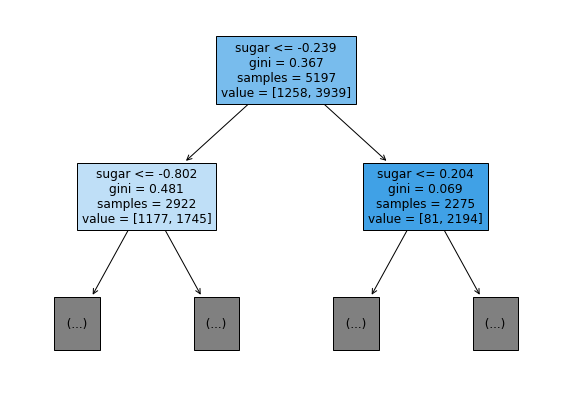

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

결정 트리는 조건이 참이면 왼쪽 노드, 거짓이면 오른쪽 노드로 이동하게 된다.<br>
예측 방법은 리프노드에 도달 시, 해당 리프노드에서 가장 많은 클래스가 예측 클래스가 되는 것이다.

gini는 __지니 불순도__를 의미한다.
지니 불순도는 노드에서 데이터를 분류할 조건의 기준을 정하는 역할을 한다.

지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다.<br>

> 클래스가 1:1 비율로 있다면 지니 불순도는 0.5의 값을 갖게 되어 최악이다.<br>
그러나 1:0의 비율로 한 노드에 몰아져있으면 지니 불순도는 0의 값을 갖게 되고 이를 순수 노드라고 한다.

결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.




결정 트리에서는 gini 불순도 말고 __entropy 불순도__가 있다.<br>
엔트로피 불순도는 지니 불순도처럼 제곱을 사용하여 더하지 않고 밑이 2인 로그를 씌워 더해준다.<br>



# 가지치기
트리가 무작정 끝까지 자라나게 냅두면 과대적합이 될테니 중간에 가지를 끊어줘야한다.<br>
다음과 같은 매개변수를 통해 가지치기가 가능하다<br>
>max_depth   >> 최대 깊이<br> 
min_impurity_decrease  >> 최소 불순도


In [34]:
# 루트 노드 아래로 최대 3개의 노드까지만 성장하게 설정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


+ 결정 트리는 표준화를 할 필요가 없다는 장점을 가지고 있다.

In [35]:
# 표준화 이전의 데이터를 가지고 모델링 >> 차이 없는 것을 확인
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


In [37]:
# 마지막으로 결정 트리는 가장 유용한 특성이 무엇인지 알려줌.
dt.feature_importances_
# 두 번째 특성인 당도가 0.87 정도로 특성 중요도가 가장 높음

array([0.12345626, 0.86862934, 0.0079144 ])